<a href="https://colab.research.google.com/github/ThanhVanLe0605/Data-Mining-For-Business-Analytics-In-Python/blob/main/Chapter_05_Performance_Predictive_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHAPTER SUMMARY: ASSESSING PREDICTIVE PERFORMANCE

This chapter focuses on methodologies for eveluating the predictive performance of data mining models, emphasizing the distinction between training and validation phases.

**1. The danger of overfitting**
* **a.** The text highlights the risk of models fitting the **training data** too closely (overfitting)
* **b.** It stresses the necessity of testing performance on **validation data** ( data not used during the training step) to ensure generalizability.

**2. Performance metrics by task type**
* **a. Prediction (Regression Tasks:**
    * Metrics include Average Error, **MAPE** (Mean Absolute Percentage Error, and **RMSE** (Root Mean Squared Error.
* **b. Classification Tasks:**
    * Metrics are based on the **Confusion Matrix**, including Overall Accuracy, Specificity, and Sensitivity.
    * Consideration of **misclassification costs** is also discussed.

**3. Thresholds and ROC Curves**
* **a.** The chapter explains the relationship between the choixe of **cutoff value** (threshold and classification performance.
* **b.** It introduces the **ROC(Receiver Operating Characteristics curve** as a standard chart for assessing method performance across different cutoff values.

**4. Ranking vs. Classificatiion**
* **a.** When the goal is to identify the most **interesting** records(e.g., the top 1% most likely to respond rather than classifying the entire sample, this is defined as **Ranking**
* **b.** **Lift Charts** are the primary tool used to assess performance for ranking tasks.

**5. Advanced handling and diagnosis**
* **a.Rare Classes:** Discusses the need for **oversampling** rare classes and the subsequent adjustment of performance metrics.
* **b.Detecting Overfitting:** Suggests comparing metrics from validation data against training data. While minor differences are expected, extreme discreoancies serve as an indicator of overfitting.

TABLE OF CONTENTS:

* 5.1. [INTRODUCTION](https://colab.research.google.com/drive/1oPw5ncb4a9kGssdDUoVsfW1LPWDhqUEf#scrollTo=sKZiEXLqzRiv&line=1&uniqifier=1)

* 5.2. [EVALUATING PREDICTIVE PERFORMANCE](https://colab.research.google.com/drive/1oPw5ncb4a9kGssdDUoVsfW1LPWDhqUEf#scrollTo=wdp0r2zczrT_&line=1&uniqifier=1)

* 5.3. [JUDGING CLASSIFIER PERFORMANCE](https://colab.research.google.com/drive/1oPw5ncb4a9kGssdDUoVsfW1LPWDhqUEf#scrollTo=tY_IKscexCH6&line=1&uniqifier=1)

* 5.4. [JUDGING RANKING PERFORMANC](https://colab.research.google.com/drive/1oPw5ncb4a9kGssdDUoVsfW1LPWDhqUEf#scrollTo=c8ImfB5e3PqR&line=1&uniqifier=1)

* 5.5. [OVERSAMPLING](https://colab.research.google.com/drive/1oPw5ncb4a9kGssdDUoVsfW1LPWDhqUEf#scrollTo=jk1T56DZxaZp&line=1&uniqifier=1)

**Python**

In this chapter, we will use **pandas** for data handling, **statsmodels** for regression models, **scikit-learn** for performance metrics, and **matplotlib** for visualization. We will also make use of the utility functions from the Python Utilities Functions Appendix

**import required functionality for this chapter**

In [3]:
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt

!pip install dmba
from dmba import regressionSummary, classificationSummary
from dmba import liftChart, gainsChart

# 5.1. INTRODUCTION

* In supervised learning, we are interested in predicting the outcome variable for new records. Three main types of outcomes of interest are:
  * **Predicted numerical value:** whe the outcome variable is **numerical** (e.g., house price
  * **Predicted class membership:** when the outcome variable is **categorical** (e.g., buyer/ nonbuyer)
  * **Propensity:** **the probability** of class membership, when the outcome variable is **categorical** (e.g., the propensity to default
* Prediction methods are used for generating numerical predictions, while classificatiion models ("classifiers" are used for are used for generating propensities and, using a cutoff value on the propensities, we can generate predicted class memberships.
* A subtle distinction to keep in mind is the two distinct predictive uses of classifiers: one use, *classification*, is aimed at predicting class membershiip for new records. The other, **ranking**, is detecting among a set of new records the ones most likely to belong to a class of interest.
* Let's now examine the approach for judging the usefulness of a prediction method used for generating numerical predictiions (Section 5.2, a classifier used for classification (Section 5.3, and a classifier used for ranking (Section 5.4). Section 5.5, we'll look at evaluating performance under the scenario of oversampling.

# 5.2. EVALUATING PREDICTIVE PERFORMANCE

### Core Concepts in Performance Evaluation



* **Predictive Accuracy vs. Goodness-of-Fit**
    * **Classical Statistics:** Focuses on *goodness-of-fit* (e.g., $R^2$), measuring how well a model fits the data it was trained on.
    * **Data Mining:** Prioritizes *predictive accuracy*, focusing on how the model performs when applied to **new records**.
* **The Validation Set**
    * Models are built on the **Training Set** but evaluated on the **Validation Set**.
    * The validation set serves as an objective ground because it was not used to select predictors or estimate parameters.



## Naive Benchmark: The average

* The simplest baseline: predicting the average of the training data ($\bar{y}$) for every new record.
* A useful predictive model **must** outperform this benchmark.

## Prediction Accuracy Measures

The prediction error for record $i$ is: $e_i = y_i - \hat{y}_i$.

| Metric | Formula | Description |
| :--- | :--- | :--- |
| **MAE** | $\frac{1}{n} \sum_{i=1}^{n} |e_i|$ | **Mean Absolute Error**: Average magnitude of error. |
| **Mean Error** | $\frac{1}{n} \sum_{i=1}^{n} e_i$ | Shows if the model is biased (**over** or **under** predicting). |
| **MPE** | $100 \times \frac{1}{n} \sum_{i=1}^{n} (e_i/y_i)$ | **Mean Percentage Error**: Percentage deviation with direction. |
| **MAPE** | $100 \times \frac{1}{n} \sum_{i=1}^{n} |e_i/y_i|$ | **Mean Absolute Percentage Error**: Absolute % deviation. |
| **RMSE** | $\sqrt{\frac{1}{n} \sum_{i=1}^{n} e_i^2}$ | **Root Mean Squared Error**: Penalizes large errors; same units as $y$. |

### Outliers and Error Distribution

* **Sensitivity:** All mean-based metrics above are highly influenced by **outliers**.
* **Diagnostic Steps:**
    * **a.** Compare mean-based measures against **median-based** measures.
    * **b.** Use **Histograms** to see the error frequency.
    * **c.** Use **Boxplots** to identify specific outliers in the predictions.
* **Insight:** Plotting the distribution of errors often highlights more information than the summary metrics alone (e.g., discovering that most errors fall within a specific range like $[-2000, 2000]$).

## Comparing Training and Validation Performance

* **Model Fit vs. Prediction**
    * **Training Errors:** Reflect how well the model fits the training data (Model Fit).
    * **Validation Errors:** Measure the model's ability to predict new data (Predictive Performance).
* **Overfitting Indicators**
    * We expect training errors to be smaller than validation errors.
    * A large gap between training and validation error indicates **Overfitting**.
    * In extreme cases, training error may reach zero while validation error remains high.
* **Comparison Strategy**
    * It is essential to compare error plots (Histograms, Boxplots) and metrics (RMSE, MAE) for both sets to ensure the error distribution is similar.

## Cumulative Gains and Lift Charts

* **The Goal of Ranking**
    * Used when the objective is to find a subset of records with the highest cumulative predicted values rather than predicting specific values for every record.
    * Relevant for business scenarios like identifying the "top" cars for resale to maximize revenue.
* **Cumulative Gains Chart**
    * Records are ordered by predicted value from high to low.
    * The **y-axis** plots the cumulative actual values, and the **x-axis** plots the number of records accumulated.
    * The further the curve stays above the diagonal **diagonal benchmark line**, the better the model separates high-value from low-value records.
* **Decile Lift Chart**
    * Data is grouped into 10 equal parts (**deciles**).
    * **Lift:** The ratio of the model’s performance in a decile compared to a naive (random) benchmark.
    * *Example:* A lift of 1.76 means the top 10% selected by the model yields 1.76 times more revenue than 10% selected at random.

**FIGURE 5.1. PREDICTION ERROR METRICS FROM A MODEL FOR TOYOTA CAR PRICES, TRAINING AND VALIDATION**

In [4]:
# LOAD DATA FRAME AND SELECT COLUMNS FOR REGRESSION ANALYSIS
car_df = pd.read_csv('ToyotaCorolla.csv')

# CREATE A LIST OF REDICTOR VARIABLES BY REMOVING OUTPUT VARIABLES AND TEXT COLUMNS
excludeColumns = ('Price', "Id", "Model", "Fuel_Type", "Color")
predictors = [s for s in car_df.columns if s not in excludeColumns]
outcome = 'Price'
# PARTITION DATA
X = car_df[predictors]
y = car_df[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.4, random_state= 1)

# train linear regression model
reg = LinearRegression()
reg.fit(train_X, train_y)

# evaluate performance
# train
regressionSummary(train_y, reg.predict(train_X))
# validation
regressionSummary(valid_y, reg.predict(valid_X))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1121.1557
            Mean Absolute Error (MAE) : 811.5299
          Mean Percentage Error (MPE) : -0.8633
Mean Absolute Percentage Error (MAPE) : 8.0040

Regression statistics

                      Mean Error (ME) : 96.9035
       Root Mean Squared Error (RMSE) : 1385.5390
            Mean Absolute Error (MAE) : 881.4138
          Mean Percentage Error (MPE) : 0.0113
Mean Absolute Percentage Error (MAPE) : 8.8828


### Calculation Logic for Lift


* **Baseline Calculation:** Total actual values divided by the number of deciles (e.g., total sales / 10).
* **Model Calculation:** Sum of actual values for the records with the highest predicted values in that specific decile.
* **Lift Ratio:** $\text{Lift} = \frac{\text{Cumulative Gains from Model}}{\text{Cumulative Gains from Naive Benchmark}}$.

## FIGURE 5.1. HISTOGRAM AND BOXPLOTS OF TOYOTA PRICE REDICTION ERRORS, FOR TRAINING AND VALIDATION SETS

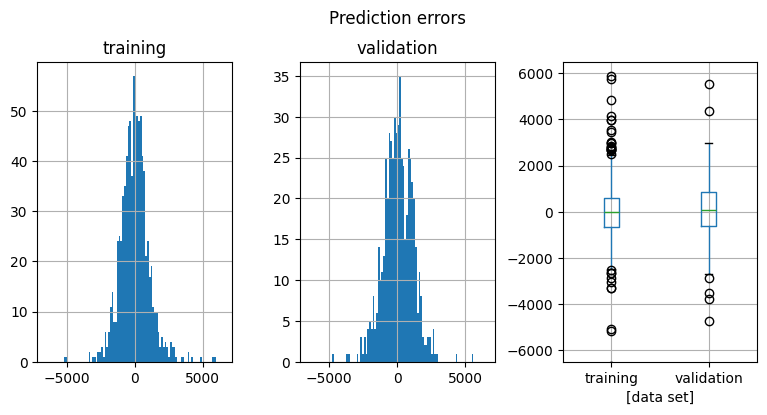

In [5]:
# code for FIGURE 5.1.

pred_error_train = pd.DataFrame({
    'residual' : train_y - reg.predict(train_X),
    'data set' : 'training'
})

pred_error_valid = pd.DataFrame({
    'residual' : valid_y - reg.predict(valid_X),
    'data set' : 'validation'
})
# Use pd.concat instead of .append
boxdata_df = pd.concat([pred_error_train, pred_error_valid], ignore_index=True)

fig, axes = plt.subplots(nrows = 1, ncols = 3)
fig.set_size_inches(9, 4)
common = {'bins': 100, 'range': [-6500, 6500]}
pred_error_train.hist(ax= axes[0], **common)
pred_error_valid.hist(ax=axes[1], **common)
boxdata_df.boxplot(ax= axes[2], by = 'data set')

axes[0].set_title('training')
axes[1].set_title('validation')
axes[2].set_title(' ')
axes[2].set_ylim(-6500, 6500)
plt.suptitle("Prediction errors") # Corrected suptitile to suptitle
plt.subplots_adjust(bottom =0.1, top= 0.85, wspace= 0.35)
plt.show()

## FIGURE 5.2. CUMULATIVE GAINS CHART (a) AND DECILE LIFT CHART (b) FOR CONTINUOUS OUTCOME VARIABLE (SALES OF TOYOTA CARS)

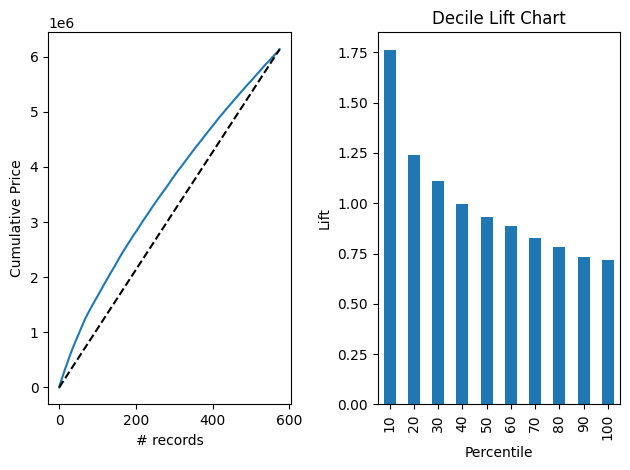

In [6]:
# code for generating cumulatie gains and decile lift charts in Figure 5.2

# sort the actual values in descending preder the
predictiondf = pd.DataFrame(
    {'predicted': reg.predict(valid_X),
     'actual' : valid_y}
)

df = predictiondf.sort_values(by = ['predicted'], ascending = False)

fig, axes = plt.subplots(nrows = 1, ncols = 2)
ax = gainsChart(df['actual'], ax = axes[0])
ax.set_ylabel("Cumulative Price")
ax.set_xlabel("# records")

ax = liftChart(df['actual'], ax = axes[1], labelBars = False)
ax.set_ylabel("Lift")
plt.tight_layout()
plt.show()

# 5.3. JUDGING CLASSIFIER PERFORMANCE


This section analyzes the predictive performance of the Linear Regression model applied to the **Validation Set** (575 Toyota cars). We use two primary visualizations to measure how well the model ranks high-value observations compared to a random selection.

**1. Cumulative Gains Chart (Left Panel)**
* **a. Structure:** The X-axis represents the number of records (sorted descending by predicted price), and the Y-axis represents the cumulative actual price (revenue).
* **b. Performance:** The model's curve (blue line) rises steeply and stays well above the diagonal baseline (dashed line).
* **c. Interpretation:** This "bowed" shape confirms that the model effectively sorts the most valuable cars to the top of the list, allowing us to "skim the cream" (capture the highest value) early in the dataset.

**2. Decile Lift Chart (Right Panel)**
* **a. The "Lift" Concept:** This chart quantifies how much better the model performs compared to a random guess (benchmark) for each decile (10% chunk of data).
* **b. Key Insight (Top 10%):**
    * Focusing on the first bar (Decile 10), the lift value is approximately **1.77**.
    * **Meaning:** If we select the top 10% of cars based on the model's predictions, we generate **1.77 times** the revenue compared to selecting a random 10% of cars.
* **c. Trend:** The lift values decrease across subsequent deciles (Decile 20 is ~1.25, Decile 30 is ~1.1), confirming the model has correctly concentrated the highest value targets in the first decile.

**3. Business Implication**
* **Resource Optimization:** The model allows the business to prioritize the top 10% of inventory. By focusing efforts on just these top-ranked cars, we can achieve nearly double the revenue efficiency compared to a random approach, significantly saving time and operational costs.

## BENCHMARK: THE NAIVE RULE

* **Concept:** A simple baseline rule that classifies every record as belonging to the **majority class**, ignoring all other predictor information.
* **Usage:** Any sophisticated model must outperform this naive benchmark to be considered useful.

## Class Separation

* **High Separation:** If predictors clearly separate the classes (e.g., distinct clusters), a good classifier can be found even with a small dataset.
* **Low Separation:** If classes overlap significantly in the predictor space, even large datasets may not yield accurate models.

## The Confusion (Classification) Matrix

* **Definition:** A matrix that summarizes the correct and incorrect classifications produced by a model.
    * **Diagonal cells:** Correct classifications (Predicted Class matches Actual Class).
    * **Off-diagonal cells:** Misclassifications (Errors).
* **Reliability:** The accuracy rates derived from this matrix are estimates. For these estimates to be reliable, the dataset must be **large enough**, and the classes should not be **very rare**.

## FIGURE 5.3. HIGH (a) AND LOW (b) LEVELS OF SEPARATION BETWEEN TWO CLASSES, USING TWO PREDICTORS

**TABLE 5.4. 24 RECORDS WITH THEIR ACTUAL CLASS AND THE PROBABILITY (PROPENSITY) OF THEM BRING CLASS 'OWNER' MEMBERS, AS ESTIMATING BY A CLASSIFIER**

In [7]:
owner_df = pd.read_csv('ownerExample.csv')
owner_df

,Class,Probability
0,owner,0.9959
1,owner,0.9875
2,owner,0.9844
3,owner,0.9804
4,owner,0.9481
5,owner,0.8892
6,owner,0.8476
7,nonowner,0.7628
8,owner,0.7069
9,owner,0.6807


References:
* [Python map() function](https://www.geeksforgeeks.org/python/python-map-function/)
* [Pandas Dataframe.sort_values()](https://www.geeksforgeeks.org/pandas/python-pandas-dataframe-sort_values-set-1/)
* [NumPy - linspace() Function](https://www.geeksforgeeks.org/python/numpy-linspace/)
* [What is numpy.linspace() in Python?](https://www.analyticsvidhya.com/blog/2024/02/numpy-linspace-in-python/)

In [8]:
import numpy as np

a = np.linspace(13, 25, num = 7, dtype = np.integer)
a

array([13, 15, 17, 19, 21, 23, 25])

In [9]:
b = np.arange(13, 25, step = 2)
b

array([13, 15, 17, 19, 21, 23])

In [10]:
c = np.arange(13, 26, step =2)
c

array([13, 15, 17, 19, 21, 23, 25])

References:
* [numpy.clip() in Python](https://www.geeksforgeeks.org/python/numpy-clip-in-python/)
* [numpy.log10() in Python](https://www.geeksforgeeks.org/python/numpy-log10-python/)
* [matplotlib.figure](https://matplotlib.org/stable/api/figure_api.html)
* [link text](https://)

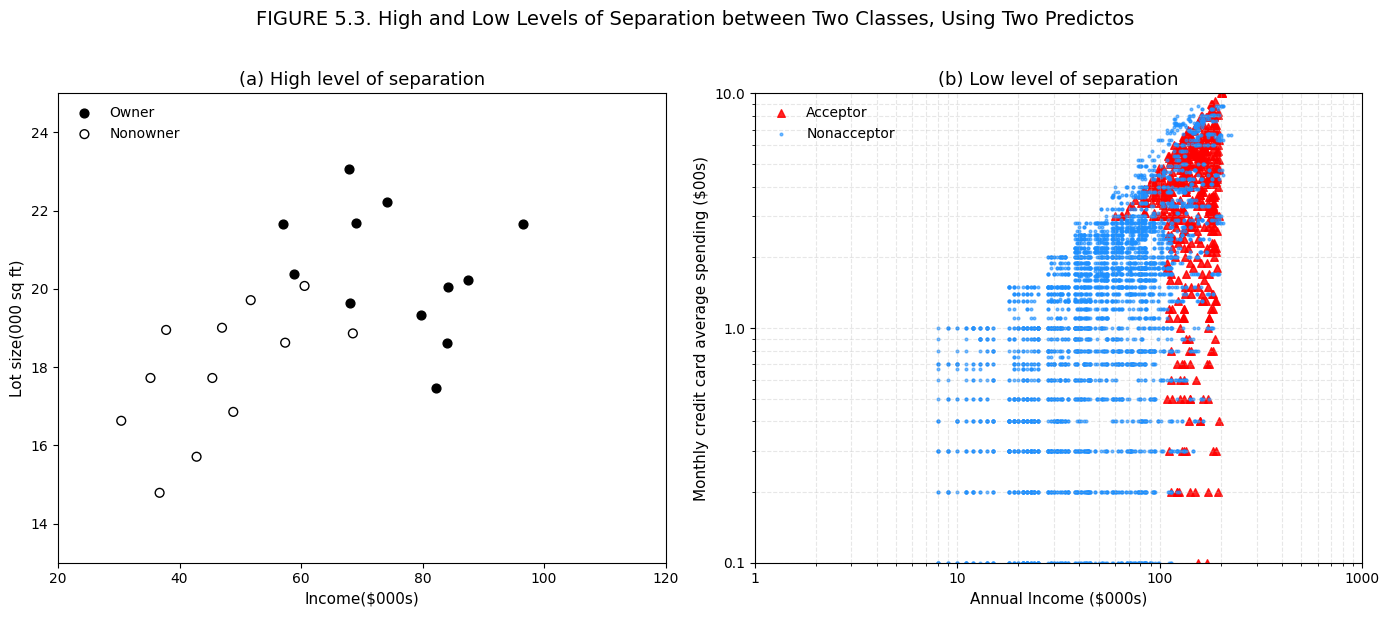

In [11]:
# Load and prepare data
df_owner = pd.read_csv('ownerExample.csv')
credit_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

### ========= FIGURE a ==============
# Map class labels to binary: owner -> 1, nonowner -> 0
df_owner['Class'] = df_owner['Class'].map({'owner': 1, 'nonowner': 0})

# Sort by Probability in descending order
df_owner = df_owner.sort_values('Probability', ascending = False)

# Generate synethetic data
np.random.seed(42)
n = len(df_owner)

# Income : evenly spaced from 20 to 120 with small noise
income = np.linspace(20, 120, num = n) + np.random.normal(0, 2.5, n)

# Income
income = np.zeros(n)
for i in range(n):
  if df_owner['Class'].iloc[i] == 1: # Owner
    income[i] = np.random.normal(80, 20)
  else:
    income[i] = np.random.normal(50, 10)
income = np.clip(income, 20, 120)

# Lot size: Owners tend to have higher values ~21, Nonowners lower ~17
lot_size = np.zeros(n)
for i in range(n): # 0-> 23
  if df_owner["Class"].iloc[i] == 1:
    lot_size[i] = np.random.normal(21, 2)
  else:
    lot_size[i] = np.random.normal(17, 2)

# Clip values
lot_size = np.clip(lot_size, 13, 25)

### ========= FIGURE b ==============
df_bank = credit_df[['Income', 'CCAvg', 'Personal Loan']].dropna()
df_bank['Personal Loan'] = df_bank['Personal Loan'].astype(int)

# Handle zero values before log transformation
df_bank['CCAvg_log'] = np.log10(df_bank['CCAvg'].replace(0, 1e-3))

# ========= SUBPLOTS ==============
fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols = 2, figsize =(14, 6))

# Figure a : High level of separation
ax1.scatter(income[df_owner['Class'] == 1],
            lot_size[df_owner['Class'] == 1],
            color = 'black',
            marker='o',
            s = 40,
            label = 'Owner')

ax1.scatter(income[df_owner['Class'] == 0],
            lot_size[df_owner['Class'] == 0],
            facecolors='none',
            edgecolor='black',
            marker='o',
            s = 40,
            label = 'Nonowner')

# Titles and labels
ax1.set_title('(a) High level of separation', fontsize=13)
ax1.set_xlabel('Income($000s)', fontsize =11)
ax1.set_ylabel('Lot size(000 sq ft)', fontsize = 11)

ax1.set_xlim(20, 120)
ax1.set_ylim(13, 25)

# Legend in upper left, no frame
ax1.legend(loc='upper left', frameon = False, fontsize = 10)

# No grid
ax1.grid(False)

# Figure b : Low level of separation

acceptor = df_bank[df_bank['Personal Loan'] == 1]
nonacceptor = df_bank[df_bank['Personal Loan'] == 0]

# Acceptor: red triangles
ax2.scatter(acceptor['Income'], acceptor['CCAvg'],
            color = 'red', marker = '^', s = 30,
            alpha = 0.85, label = 'Acceptor')

# Nonacceptor: small blue dots
ax2.scatter(nonacceptor['Income'], nonacceptor['CCAvg'],
            color = 'dodgerblue', marker = '.', s = 15,
            alpha = 0.6, label = 'Nonacceptor')

# Use log scale for bot axes
ax2.set_xscale('log')
ax2.set_yscale('log')

ax2.set_xlim(1, 1000)
ax2.set_ylim(0.1, 10)

# Titles and labels
ax2.set_title('(b) Low level of separation', fontsize = 13)
ax2.set_xlabel('Annual Income ($000s)', fontsize = 11)
ax2.set_ylabel('Monthly credit card average spending ($00s)', fontsize=11)

# Custom ticks for log scale
ax2.set_xticks([1, 10, 100, 1000])
ax2.set_yticks([0.1, 1, 10])

# Show actual numbers instead of powers of 10
# It prevents from using scientific numbers such as 1e6 and shows full numbers instead
ax2.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax2.get_yaxis().set_major_formatter(plt.ScalarFormatter())

# Light grid
ax2.grid(True, which='both', linestyle='--', alpha =0.3)

# Legend in upper left, no frame
ax2.legend(loc='upper left', fontsize=10, frameon=False)


# Overall title
plt.suptitle('FIGURE 5.3. High and Low Levels of Separation between Two Classes, Using Two Predictos', fontsize= 14, y =1.02)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Using the Validation data

## TABLE 5.2. CONFUSION MATRIX BASED ON 3000 RECORDS AND TWO CLASSES

## Accuracy Measures

## Propensities and Cutoff for Classification

## TABLE 5.3. CONFUSION MATRIX: MEANING OF EACH CELL

In [12]:
owner_df = pd.read_csv('ownerExample.csv')
## cutoff =0.5
predicted = ['owner' if p > 0.5 else 'nonowner' for p in owner_df.Probability]
classificationSummary(owner_df.Class, predicted, class_names=['nonowner', 'owner'])

Confusion Matrix (Accuracy 0.8750)

         Prediction
  Actual nonowner    owner
nonowner       10        2
   owner        1       11


In [13]:
## cutoff =0.25
predicted = ['owner' if p > 0.25 else 'nonowner' for p in owner_df.Probability]
classificationSummary(owner_df.Class, predicted, class_names=['nonowner', 'owner'])

Confusion Matrix (Accuracy 0.7917)

         Prediction
  Actual nonowner    owner
nonowner        8        4
   owner        1       11


In [14]:
## cutoff =0.75
predicted = ['owner' if p > 0.75 else 'nonowner' for p in owner_df.Probability]
classificationSummary(owner_df.Class, predicted, class_names=['nonowner', 'owner'])

Confusion Matrix (Accuracy 0.7500)

         Prediction
  Actual nonowner    owner
nonowner       11        1
   owner        5        7


## Performance in  Case of Unequal Importance Classes

## FIGURE 5.4. PLOTTING ACCURACY AND OVERALL ERROR AS A FUNCTION OF THE CUTOFF VALUE (RIDING MOWERS EXAMPLE)

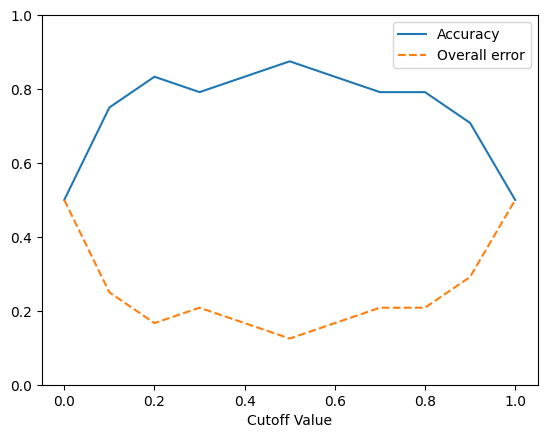

In [15]:
df = pd.read_csv('liftExample.csv')

cutoffs = [i *0.1 for i in range(0, 11)]
accT = []
for cutoff in cutoffs:
  predicted = [1 if p > cutoff else 0 for p in df.prob]
  accT.append(accuracy_score(df.actual, predicted))

line_accuracy = plt.plot(cutoffs, accT, '-', label = 'Accuracy')[0]
line_error = plt.plot(cutoffs, [1 - acc for acc in accT], '--', label ='Overall error')[0]
plt.ylim([0,1])
plt.xlabel('Cutoff Value')
plt.legend(handles=[line_accuracy, line_error])
plt.show()

## Asymmetric Misclassification COSTS

## FIGURE 5.5. ROC CURVE FOR RIDING MOWERS EXAMPLE

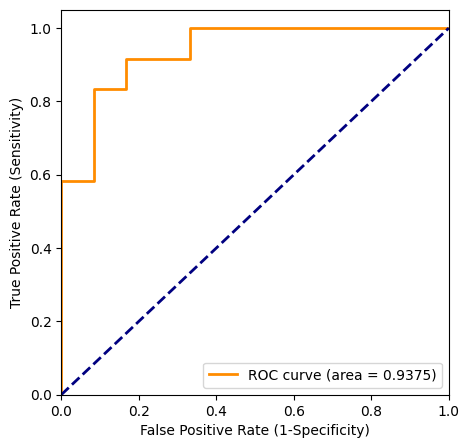

In [16]:
from sklearn.metrics import roc_curve, auc

# compute ROC(Receiver Operator Characteristic) curve and AUC(Area Under Curve)
fpr, tpr , _ = roc_curve(df.actual, df.prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = [5, 5])
plt.plot(fpr, tpr, color = 'darkorange',
         lw =2 , label = 'ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1] , [0, 1], color ='navy', lw=2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc='lower right')

References:
* [ROC and AUC, Clearly Explained!](https://www.youtube.com/watch?v=4jRBRDbJemM)

## Generalization to More Than Two Classes

# 5.4. JUDGING RANKING PERFORMANCE

## Gains and Lift Charts for Binary Data

## Sorting by Propensity

## Interpreting the Cumulative Gains Chart

## FIGURE 5.6. CUMULATIVE GAINS CHART FOR THE MOWER EXAMPLE

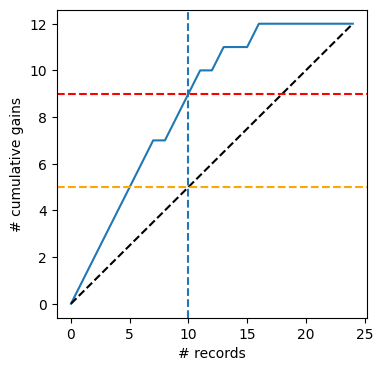

In [25]:
df = pd.read_csv('liftExample.csv')
df = df.sort_values(by=['prob'], ascending = False)
gainsChart(df.actual, figsize = (4, 4))

x_cut = 10
y_cut = df.actual.cumsum().iloc[x_cut - 1] / df.actual.sum()

plt.axhline(9, linestyle='--', c='red')
plt.axhline(5, linestyle='--', c='orange')

plt.axvline(x=x_cut, linestyle='--')
plt.show()

* **Interpreting the Cumulative Gains Chart**

    a. The **x-axis** represents the number of records selected.

    b. The **y-axis** indicates the gains curve value, which allows comparison against random assignment performance.

* **Illustrative Example (from Figure 5.6)**
    a. **Model Selection:** Choosing the top 10 records yields approximately 9 correct identifications.
    
    b. **Random Selection:** Choosing 10 records randomly is expected to yield only 5 correct identifications ($10 \times 12/24$).

[German Credit Data-Lift and Gain Charts](https://www.kaggle.com/code/satyads/german-credit-data-lift-and-gain-charts)

[Meaningful Metrics: Cumulative Gains and Lyft Charts](https://github.com/raffisahakyan/Plot_Templates/blob/master/Cumulative%20Gains%20and%20Lyft%20Charts.ipynb)

## Decile Lift Charts

## FIRGURE 5.7. DECILE LIFT CHART

<Axes: title={'center': 'Decile Lift Chart'}, xlabel='Percentile', ylabel='Lift'>

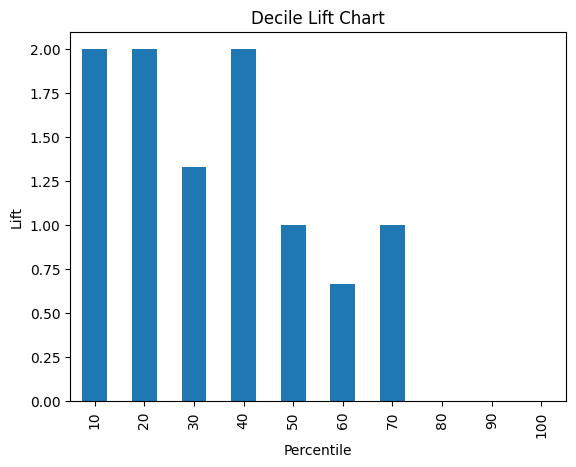

In [26]:
# use liftChart method from utilities
liftChart(df.actual, labelBars= False)

* **Understanding "Lift"**

    a. **Calculation:** Lift is the ratio of the model's performance to random selection (e.g., $9 / 5 = 1.8$).

    b. **Meaning:** A lift of 1.8 means the model is 1.8 times better at detecting class 1 members than a random guess.

* **Behavior of a Good Classifier**

    a. **High Lift:** Typically observed when acting on a small number of top-ranked records.

    b. **Decreasing Lift:** As more records are included in the selection, the lift value typically decreases.

[The code to plot the Lift Curve in Python](https://howtolearnmachinelearning.com/code-snippets/lift-curve-code-snippet/)

## Beyond Two Classes

* Gains and Lift charts are inherently designed for binary classification.

* To use them for **multiclass problems**, the problem must be reduced to a binary format: defining a single "important class" versus all other "unimportant classes".

## Gains and Lift Charts Incorporating Costs and Benefits

* **1. Incorporating Costs and Benefits (The Procedure)**
    * **Sorting:** Sort all records in descending order of their predicted probability of success (propensity).
    * **Calculation:** For each record, calculate the actual cost or benefit.
    * **Plotting:** The y-axis represents the cumulative sum of these costs/benefits as we move through the sorted records (x-axis).
    * **Reference Line:** Connects the origin to the total net value of the dataset. Note that this slope can be **negative** if the total costs outweigh total benefits (e.g., a net loss of $-\$1500$ for the entire list).

## Cumulative Gains as a Function of Cutoff

## FIGURE 5.8. CUMULATIVE GAINS CURVE INCORPORATING COSTS

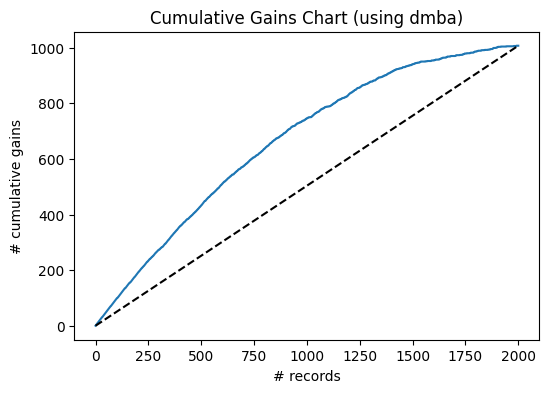

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from dmba import gainsChart # Assuming dmba is already imported and available

np.random.seed(42)
n = 2000
X = np.random.randn(n, 2)
# Tạo biến mục tiêu (y) phụ thuộc vào X
logits = 1.5 * X[:, 0] - 0.8 * X[:, 1]
probs = 1 / (1 + np.exp(-logits))
y = (np.random.rand(n) < probs).astype(int)

# Tạo DataFrame
df_data = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df_data['actual'] = y

# --- BƯỚC QUAN TRỌNG: DỰ ĐOÁN VÀ SẮP XẾP ---
# 1. Huấn luyện mô hình đơn giản
model = LogisticRegression()
model.fit(df_data[['Feature1', 'Feature2']], df_data['actual'])

# 2. Lấy xác suất dự đoán (Propensity) của lớp 1
df_data['proba'] = model.predict_proba(df_data[['Feature1', 'Feature2']])[:, 1]

# Prepare data for gainsChart: sort by predicted probability
df_sorted = df_data.sort_values(by=['proba'], ascending=False).reset_index(drop=True)

# Plot cumulative gains using dmba.gainsChart
gainsChart(df_sorted['actual'], figsize=(6, 4))
plt.title('Cumulative Gains Chart (using dmba)')
plt.show()

**Strategic Interpretation (Figure 5.8)**

  **Optimization:** The goal is to identify the subset of records where the cumulative gains curve is at its **maximum**.

  **Example:** In the provided case, mailing to the top ~3,000 candidates maximizes profit, whereas mailing to the entire list results in a loss.

 **Axis Scaling Variations**
    * **vs. Number of Records:** Best used when working with a fixed budget (e.g., "we can only afford to target $N$ customers").
    * **vs. Cutoff Value:** Best used when the goal is to determine a probability threshold that distinguishes well between classes.

**Multiclass Limitations**
    * Gains and Lift charts are inherently designed for binary classification.
    * To use them for **multiclass problems**, the problem must be reduced to a binary format: defining a single "important class" versus all other "unimportant classes".



# 5.5. OVERSAMPLING

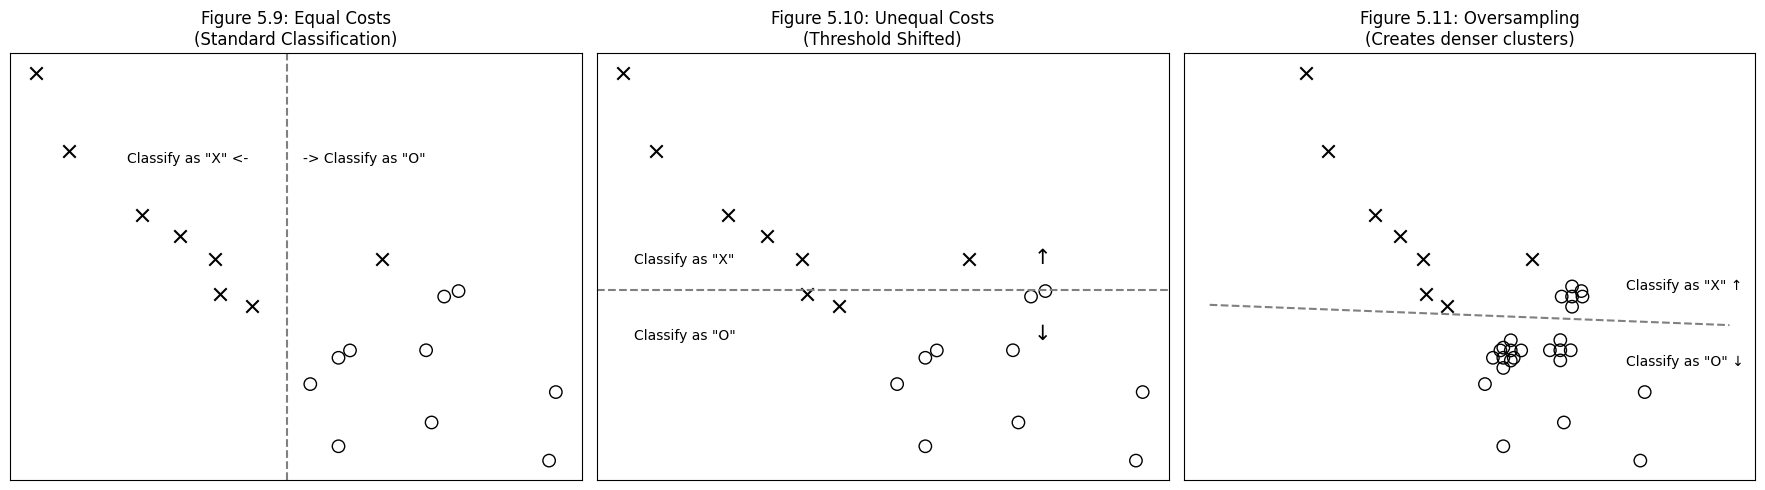

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Tạo dữ liệu giả lập phân tán (2 lớp: x và o)
np.random.seed(42)
# Lớp "o" (Negative)
x_o = np.random.normal(6, 1.5, 10)
y_o = np.random.normal(5, 1.5, 10)
# Lớp "x" (Positive) - nằm cao hơn một chút
x_x = np.random.normal(4, 1.5, 8)
y_x = np.random.normal(7, 1.5, 8)

# --- CẤU HÌNH VẼ 3 HÌNH ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# === HÌNH 5.9: EQUAL COSTS (Chi phí như nhau) ===
ax = axes[0]
ax.scatter(x_o, y_o, marker='o', s=80, facecolors='none', edgecolors='black', label='Class O')
ax.scatter(x_x, y_x, marker='x', s=80, color='black', label='Class X')
# Đường phân loại đứng (Vertical boundary) giả lập
ax.axvline(x=5, color='gray', linestyle='--')
ax.text(3, 8, 'Classify as "X" <-', fontsize=10)
ax.text(5.2, 8, '-> Classify as "O"', fontsize=10)
ax.set_title('Figure 5.9: Equal Costs\n(Standard Classification)')
ax.set_xticks([])
ax.set_yticks([])

# === HÌNH 5.10: UNEQUAL COSTS (Chi phí không đều) ===
# Giả sử bỏ sót "x" rất tốn kém -> Dời ngưỡng để bắt nhiều "x" hơn (Hạ thấp đường phân chia)
ax = axes[1]
ax.scatter(x_o, y_o, marker='o', s=80, facecolors='none', edgecolors='black')
ax.scatter(x_x, y_x, marker='x', s=80, color='black')
# Đường phân loại ngang (Horizontal boundary) bị đẩy xuống thấp
boundary_y = 5.5
ax.axhline(y=boundary_y, color='gray', linestyle='--')
ax.text(2, boundary_y + 0.5, 'Classify as "X"', fontsize=10)
ax.text(7, boundary_y + 0.5, '↑', fontsize=15) # Mũi tên chỉ vùng trên
ax.text(2, boundary_y - 1.0, 'Classify as "O"', fontsize=10)
ax.text(7, boundary_y - 1.0, '↓', fontsize=15) # Mũi tên chỉ vùng dưới
ax.set_title('Figure 5.10: Unequal Costs\n(Threshold Shifted)')
ax.set_xticks([])
ax.set_yticks([])

# === HÌNH 5.11: OVERSAMPLING (Lấy mẫu quá mức) ===
# Nhân bản các điểm "o" để tạo "đám đông" (cluster) buộc mô hình phải đẩy đường ranh giới đi
ax = axes[2]
# Vẽ dữ liệu gốc
ax.scatter(x_x, y_x, marker='x', s=80, color='black')
# Vẽ dữ liệu "o" nhưng dạng cluster (nhân bản lên)
# Chọn một vài điểm "o" để oversample (vẽ đè lên nhau hoặc lệch chút xíu cho giống hình)
for i in range(len(x_o)):
    # Vẽ điểm gốc
    ax.scatter(x_o[i], y_o[i], marker='o', s=80, facecolors='none', edgecolors='black')
    # Nếu điểm này nằm gần ranh giới, vẽ thêm các điểm "copy" xung quanh (giả lập Oversampling)
    if 4 < x_o[i] < 7 and 4 < y_o[i] < 6:
        # Vẽ cụm 4 điểm nhỏ xung quanh
        ax.scatter(x_o[i]+0.2, y_o[i], marker='o', s=80, facecolors='none', edgecolors='black')
        ax.scatter(x_o[i]-0.2, y_o[i], marker='o', s=80, facecolors='none', edgecolors='black')
        ax.scatter(x_o[i], y_o[i]+0.2, marker='o', s=80, facecolors='none', edgecolors='black')
        ax.scatter(x_o[i], y_o[i]-0.2, marker='o', s=80, facecolors='none', edgecolors='black')

# Đường ranh giới
ax.plot([0, 10], [5.2, 4.8], color='gray', linestyle='--') # Đường hơi nghiêng
ax.text(8, 5.5, 'Classify as "X" ↑', fontsize=10)
ax.text(8, 4.0, 'Classify as "O" ↓', fontsize=10)
ax.set_title('Figure 5.11: Oversampling\n(Creates denser clusters)')
ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
plt.show()

## FIGURE 5.9. CLASSIFICATION ASSUMNING EQUAL COSTS OF MISCALSSIFICATION

## FIGURE 5.10. CLASSIFICATION ASSUMING UNEQUAL COSTS OF MISCLASSIFICATION

## FIGURE 5.11. CLASSIFICATION USING OVERSAMPLING TO ACCOUNT FOR UNEQUAL COSTS

## Oversampling the Training Set

* **The Problem with Simple Random Sampling:**

    a. When classes are highly unequal (e.g., rare fraud cases vs. normal transactions), simple random sampling collects too few instances of the rare class.

    b. This prevents the model from effectively learning the characteristics of the minority class.

* **Importance of Rare Classes:** The minority class is often the class of interest (e.g., responders to a campaign, defaulters, fraudsters).

* **Cost Sensitivity:**

    a. Misclassification costs are often asymmetric. For instance, failing to detect a positive case (False Negative) might be significantly more costly than a false alarm (False Positive).

    b. Oversampling effectively incorporates these costs into the training process, forcing the algorithm to pay more attention to the rare class.

### The Oversampling Procedure (Training Phase)
To address the imbalance, practitioners typically use **Stratified Sampling** to construct the training set:
* **Step A:** Separate the data into two distinct strata: Responders (rare) and Non-responders (dominant).
* **Step B:** Construct the **Training Set** with a balanced ratio (typically 50/50):
    1. Select all (or a large portion) of the available Responders.
    2. Randomly select an equal number of Non-responders to match the Responders.
* **Step C:** Assign the remaining records to the **Validation/Test Set**.

### Evaluating Model Performance
Crucially, the evaluation strategy must reflect the real-world distribution, not the artificial training distribution.

* **Method 1: Evaluation on Non-Oversampled Data (Recommended)**
    a. Train the model using the balanced (oversampled) training set.
    b. **Validate/Score** the model on a validation set that retains the **original, natural class ratios** (i.e., simple random sampling).
    c. This provides an unbiased estimate of how the model will perform in production.

* **Method 2: Evaluation on Oversampled Data (Requires Adjustment)**
    a. If the validation set was also oversampled (e.g., for convenience during prototyping), the results will be biased.
    b. To get accurate metrics (like Confusion Matrices or Lift Charts), you must **reweight** the results.
    c. Reweighting mathematically restores the underrepresented class to its original proportion in the population.

### Post-processing: Adjusting for Oversampling Bias

When a model is trained and validated on oversampled data (e.g., 50% responders vs. 2% in reality), the raw performance metrics will be biased. To obtain realistic estimates for the original population, we must apply **reweighting techniques**.

#### A. Calculating Oversampling Weights
We determine the "weight" or "value" of each record based on the ratio between its representation in the sample versus the population.

* **Formula:** $Weight = \frac{\% \text{ in Sample}}{\% \text{ in Population}}$
* **Example:**
    * *Responders:* 50% in sample / 2% in population = **25** (Each sample responder represents 25 real responders).
    * *Non-responders:* 50% in sample / 98% in population $\approx$ **0.5102**.

#### B. Adjusting the Confusion Matrix
To correct the confusion matrix, divide the counts in the "Oversampled Matrix" by their respective weights.

1.  **Calculate Raw Counts:** Get the number of True Positives, False Positives, etc., from the oversampled validation set.
2.  **Apply Weights:**
    * Divide counts of the minority class (Responders) by their weight (e.g., $Count / 25$).
    * Divide counts of the majority class (Non-responders) by their weight (e.g., $Count / 0.5102$).
3.  **Result:** A **Reweighted Confusion Matrix** that accurately reflects the misclassification rate in the real world.

#### C. Adjusting the Cumulative Gains Curve (Lift Chart)
For business applications (e.g., maximizing profit), the Lift Chart must also be adjusted to reflect real-world costs and benefits.

**Procedure:**
1.  **Sort:** Rank all validation records by their predicted probability of success (descending).
2.  **Assign Value:** Record the actual cost or benefit associated with each outcome.
3.  **Reweight Value:** Divide the value by the oversampling weight (e.g., divide benefit by 25).
4.  **Accumulate:** Compute the cumulative sum of these adjusted values to plot the Y-axis (Cumulative Value).
5.  **Plot:** The resulting curve shows the expected real-world performance.